In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 데이터 로드
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [7]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [8]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [9]:
# 훈련-테스트셋 나누기
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### sklearn 변환기

In [11]:
# 특성을 만들거나 전처리하기 위한 변환기 임포트
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# 사용 예시
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [13]:
# 위의 예시를 훈련데이터에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [14]:
train_poly.shape

(42, 9)

In [15]:
# poly 계산식 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [16]:
# 테스트셋에 적용
test_poly = poly.transform(test_input)

In [17]:
test_poly.shape

(14, 9)

### 다중 회귀 모델 훈련

In [18]:
# 다중회귀는 선형회귀와 같지만 차원만 늘어날 뿐이다
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594145


In [21]:
print(lr.coef_, lr.intercept_)

[  34.80604039  -88.68430232 -184.11606694   -2.2696004     8.74890226
    9.41670602   27.76120631 -119.89306061   93.68198334] 124.06521772231628


In [22]:
# 특성을 더 많이 추가
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [23]:
print(train_poly.shape)

(42, 55)


In [24]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996176
-144.40585108215134


### 규제

In [25]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [26]:
# 55개의 특정을 정규화 처리
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [30]:
print(train_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]


## 릿지

#### 선형회귀 모델에 규제를 적용한 모델 중 가장 성능이 뛰어나고, 효과적인 모델은 Ridge(릿지)와 Lasso(라쏘)이다
#### 릿지는 기울기를 제곱한 값을 기준으로 규제 적용
#### 라쏘는 기울기의 절댓값을 기준으로 규제 적용
#### 두 모델의 차이는 라쏘는 아예 0으로 만들어버린다.

In [33]:
# 선형회귀 규제 모델 릿지 import
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [35]:
ridge.score(test_scaled, test_target)

0.9790693977615379

In [37]:
# Ridge모델을 만들 때 규제의 정도를 조절할 수 있음
# 적절한 값 찾기
train_score = []
test_score = []

In [39]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 빈 리스트에 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

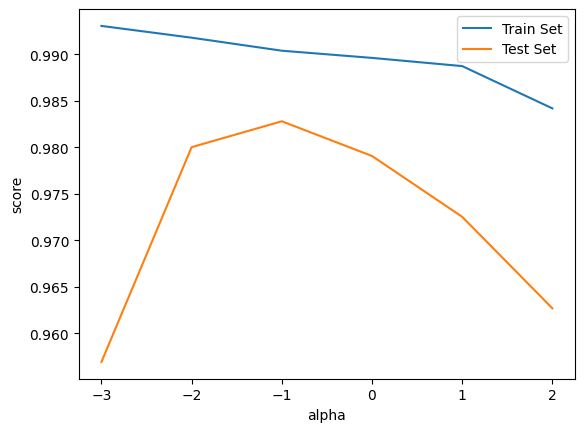

In [43]:
# alpha_list의 원소값이 10배씩 차이가 나기 때문에 0.001과 100은 엄청난 차이를 가짐
# 따라서, x축이 늘어남에 따라 왼쪽에 그래프가 몰리는 현상이 생김
# alpha_list에 6개의 값을 동일한 간격으로 나타내기 위해 로그함수로 바꿔서 지수로 표현
plt.plot(np.log10(alpha_list), train_score, label='Train Set')
plt.plot(np.log10(alpha_list), test_score, label='Test Set')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

In [44]:
# 적절한 값은 두 그래프가 가장 가깝고 테스트셋 점수가 가장 높은 -1, 즉 10의 -1승인 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386983


## 라쏘

In [47]:
# 규제모델인 라쏘 import and training
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [48]:
train_score = []
test_score = []

In [49]:
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter은 최대 학습 횟수
    # 모델 학습
    lasso.fit(train_scaled, train_target)
    # 빈 리슽으에 훈련점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\Desktop\새 폴더\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


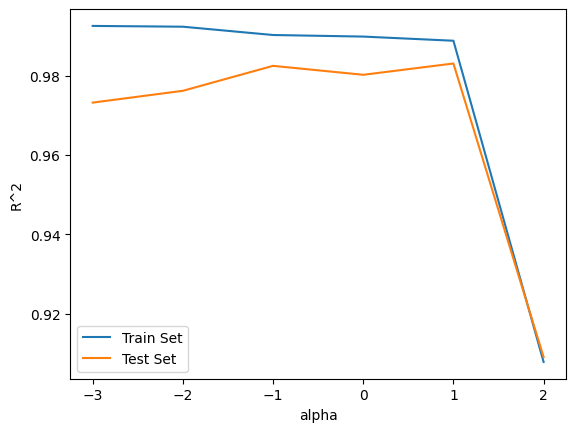

In [50]:
plt.plot(np.log10(alpha_list), train_score, label='Train Set')
plt.plot(np.log10(alpha_list), test_score, label='Test Set')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [51]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [52]:
# 계수값 확인
print(np.sum(lasso.coef_ == 0))

40
